Given the dataset, this project aims to use K- nearest neigbours to classify whether a patient has diabetes or not based on the values of the features available.

The dataset can be found at the following URL:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#Reading the csv file as a dataframe
df=pd.read_csv("diabetes.csv")

In [3]:
# Quick check of values from the top and the bottom
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Quick statistics for each of the parameters used
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Getting information about the type of data entered into each of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print("The number of features in this dataset is",len(df.columns))
print("They are as follows:")
for i in range(9):
    print(i+1,":",df.columns[i])

The number of features in this dataset is 9
They are as follows:
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


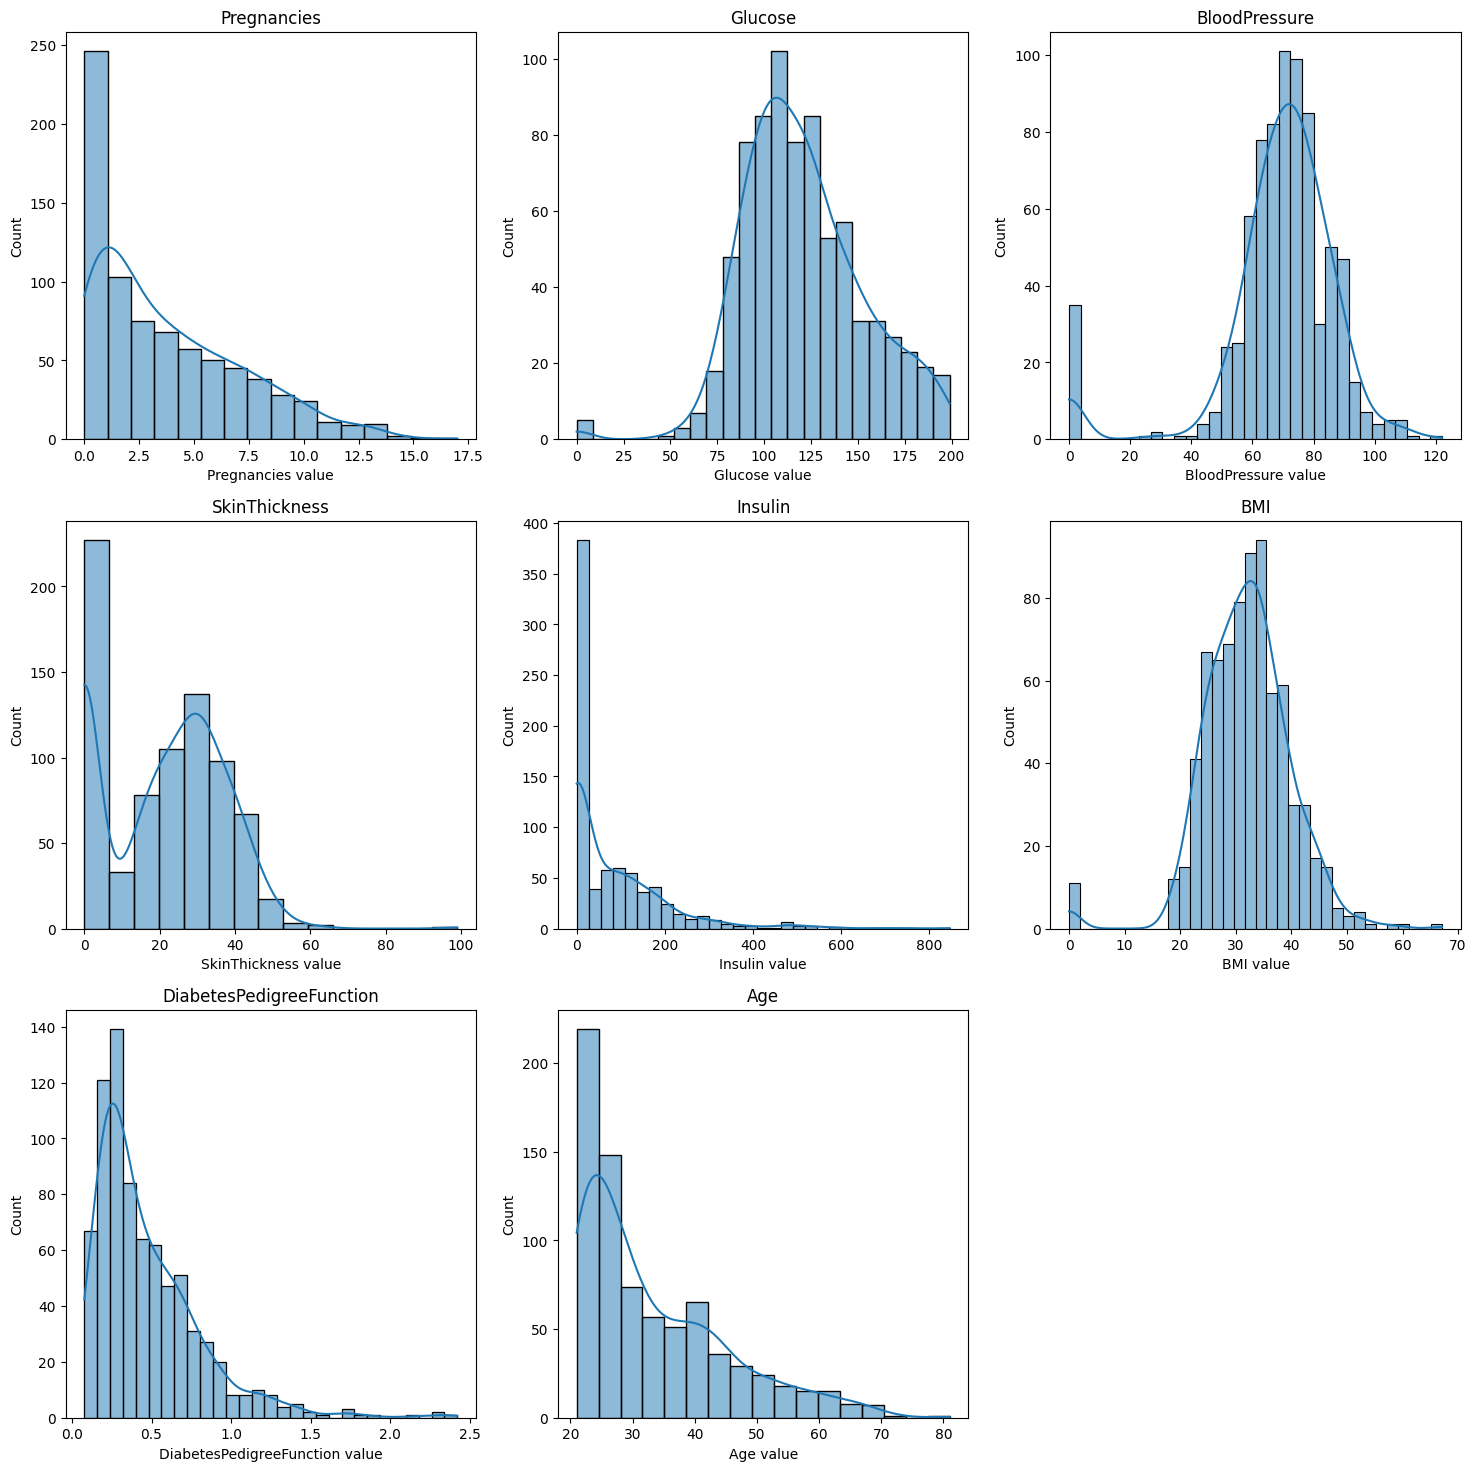

In [20]:
#Employing histograms to visualize the parameters
plt.figure(figsize=(18,18))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.histplot(df[df.columns[i-1]],kde=True).set(title=df.columns[i-1],xlabel=f"{df.columns[i-1]} value",ylabel="Count")
    

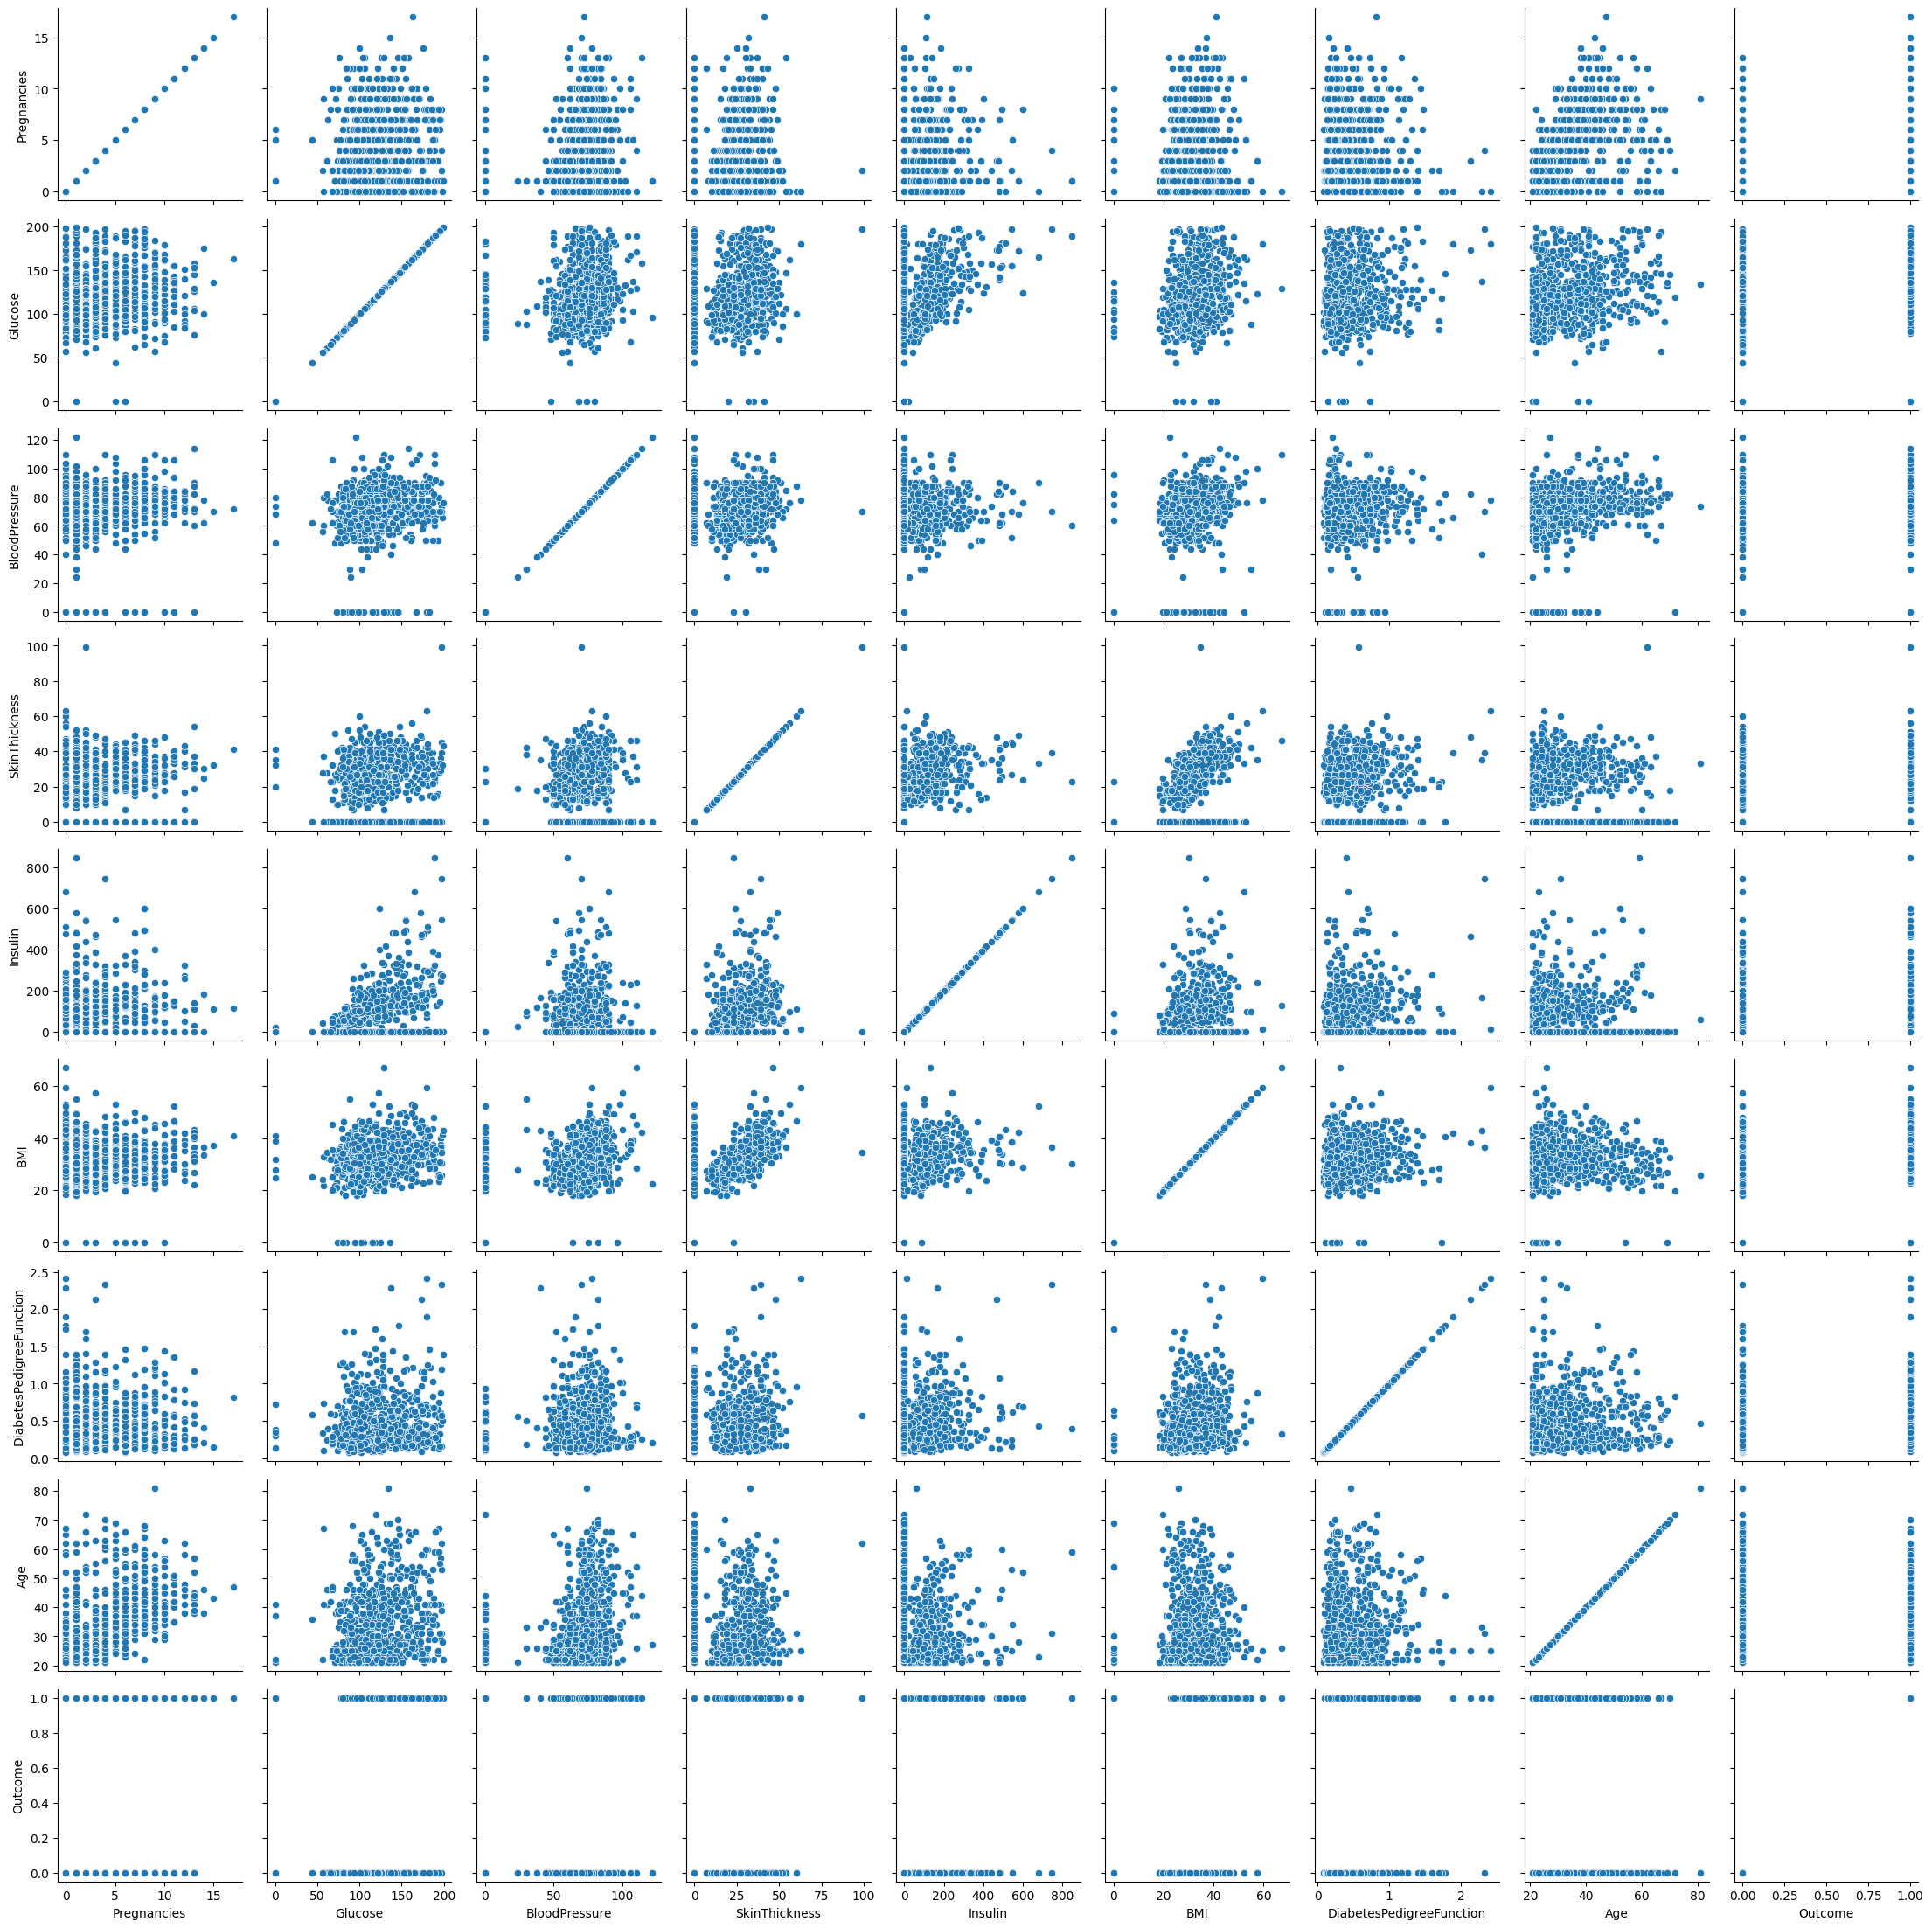

In [21]:
pg=sns.PairGrid(df)
pg.map(sns.scatterplot)

To employ supervised learning techniques,the outputs must be separated from the remaining parameters


With respect to the above sns pairgrid, no observable correlation is found between the variables.
Given the same, the following 2 are adopted:
1.Use the correlation matrix, to check for any relationships between the parameters
2.Semi-supervised learning techniques to cluster the datapoints together.

In the semi-supervised approach, the outcomes against each patient are treated as labels and the remaining parameters are used for the k -means clustering.

<Axes: >

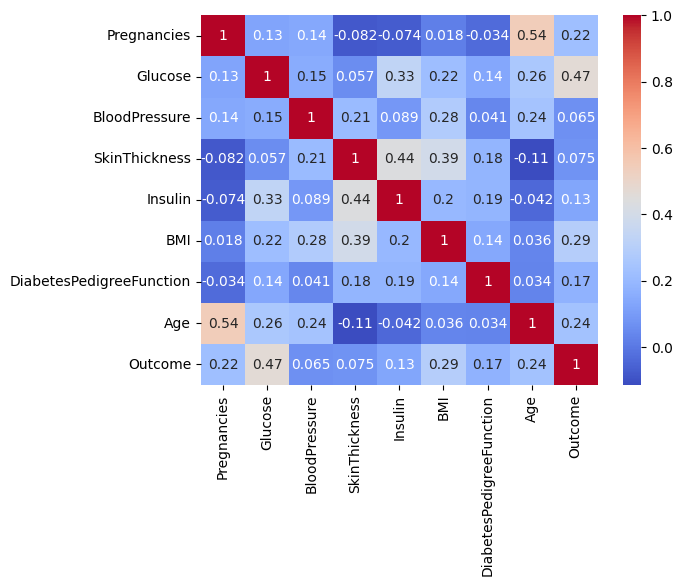

In [8]:
#Displaying the correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [9]:
#Separating the labels from the original dataframe
y=df["Outcome"]
x=df.drop("Outcome",axis='columns')

In [11]:
#For the training and validation, splitting the original dataset in the ratio 80:20
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [12]:
print(f'The size of training set is {train_x.shape}')
print(f'The size of test set is {test_x.shape}')
print(f'The size of the original dataset set is {df.shape}')

The size of training set is (614, 8)
The size of test set is (154, 8)
The size of the original dataset set is (768, 9)


In [13]:
'''
Single case of k value verification of output value against other parameters:

In the default case, metric is minkowksi:
when p value is 2,result is euclidean distance
when p is 1,result in manhattan distance
when p is 3, result is cubic root of the 3rd power of coordinates' differences
when p is 4, result is quartic root of the 4th power of coordinates' differences
'''
knn_L1=KNeighborsClassifier(n_neighbors=7,p=1)
knn_L2=KNeighborsClassifier(n_neighbors=7,p=2)
knn_L3=KNeighborsClassifier(n_neighbors=7,p=3)
knn_L4=KNeighborsClassifier(n_neighbors=7,p=4)


knn_L1.fit(train_x,train_y)
knn_L2.fit(train_x,train_y)
knn_L3.fit(train_x,train_y)
knn_L4.fit(train_x,train_y)



KNeighborsClassifier(n_neighbors=7, p=4)

In [15]:
#Assigning variables to each of the predictions
pred_y_L1=knn_L1.predict(test_x)
pred_y_L2=knn_L2.predict(test_x)
pred_y_L3=knn_L3.predict(test_x)
pred_y_L4=knn_L4.predict(test_x)

In [17]:
#Displaying the classification reports and accuracy using L1,L2,L3,L4 norms
print(f'the classification report of the k-nearest neighbour classifier with L1 norm is as follows:\n {classification_report(test_y,pred_y_L1)}')
print(f'The accuracy of the k-nearest neighbour classifier with L1 norm is {accuracy_score(test_y,pred_y_L1)*100}')

print(f'the classification report of the k-nearest neighbour classifier with L2 norm is as follows:\n {classification_report(test_y,pred_y_L2)}')
print(f'The accuracy of the k-nearest neighbour classifier with L2 norm is {accuracy_score(test_y,pred_y_L2)*100}')

print(f'the classification report of the k-nearest neighbour classifier with L3 norm is as follows:\n {classification_report(test_y,pred_y_L3)}')
print(f'The accuracy of the k-nearest neighbour classifier with L3 norm is {accuracy_score(test_y,pred_y_L3)*100}')

print(f'the classification report of the k-nearest neighbour classifier with L4 norm is as follows:\n {classification_report(test_y,pred_y_L4)}')
print(f'The accuracy of the k-nearest neighbour classifier with L4 norm is {accuracy_score(test_y,pred_y_L4)*100}')


the classification report of the k-nearest neighbour classifier with L1 norm is as follows:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        99
           1       0.56      0.64      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.69       154

The accuracy of the k-nearest neighbour classifier with L1 norm is 68.83116883116884
the classification report of the k-nearest neighbour classifier with L2 norm is as follows:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.56      0.62      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.69       154

The accuracy of the k-nearest neighbour classifier with L2 norm is 68.83116

In [19]:
#Finding the number of nearest neighbours such that its accuracy is the best

accuracy_list_L1=[]
accuracy_list_L2=[]
accuracy_list_L3=[]
accuracy_list_L4=[]

for i in range(1,201):
    knn_L1=KNeighborsClassifier(n_neighbors=i,p=1)
    knn_L2=KNeighborsClassifier(n_neighbors=i,p=2)
    knn_L3=KNeighborsClassifier(n_neighbors=i,p=3)
    knn_L4=KNeighborsClassifier(n_neighbors=i,p=4)
    
    knn_L1.fit(train_x,train_y)
    knn_L2.fit(train_x,train_y)
    knn_L3.fit(train_x,train_y)
    knn_L4.fit(train_x,train_y)

    pred_y_L1=knn_L1.predict(test_x)
    pred_y_L2=knn_L2.predict(test_x)
    pred_y_L3=knn_L3.predict(test_x)
    pred_y_L4=knn_L4.predict(test_x)

    accuracy_list_L1.append(accuracy_score(test_y,pred_y_L1))
    accuracy_list_L2.append(accuracy_score(test_y,pred_y_L2))
    accuracy_list_L3.append(accuracy_score(test_y,pred_y_L3))
    accuracy_list_L4.append(accuracy_score(test_y,pred_y_L4))

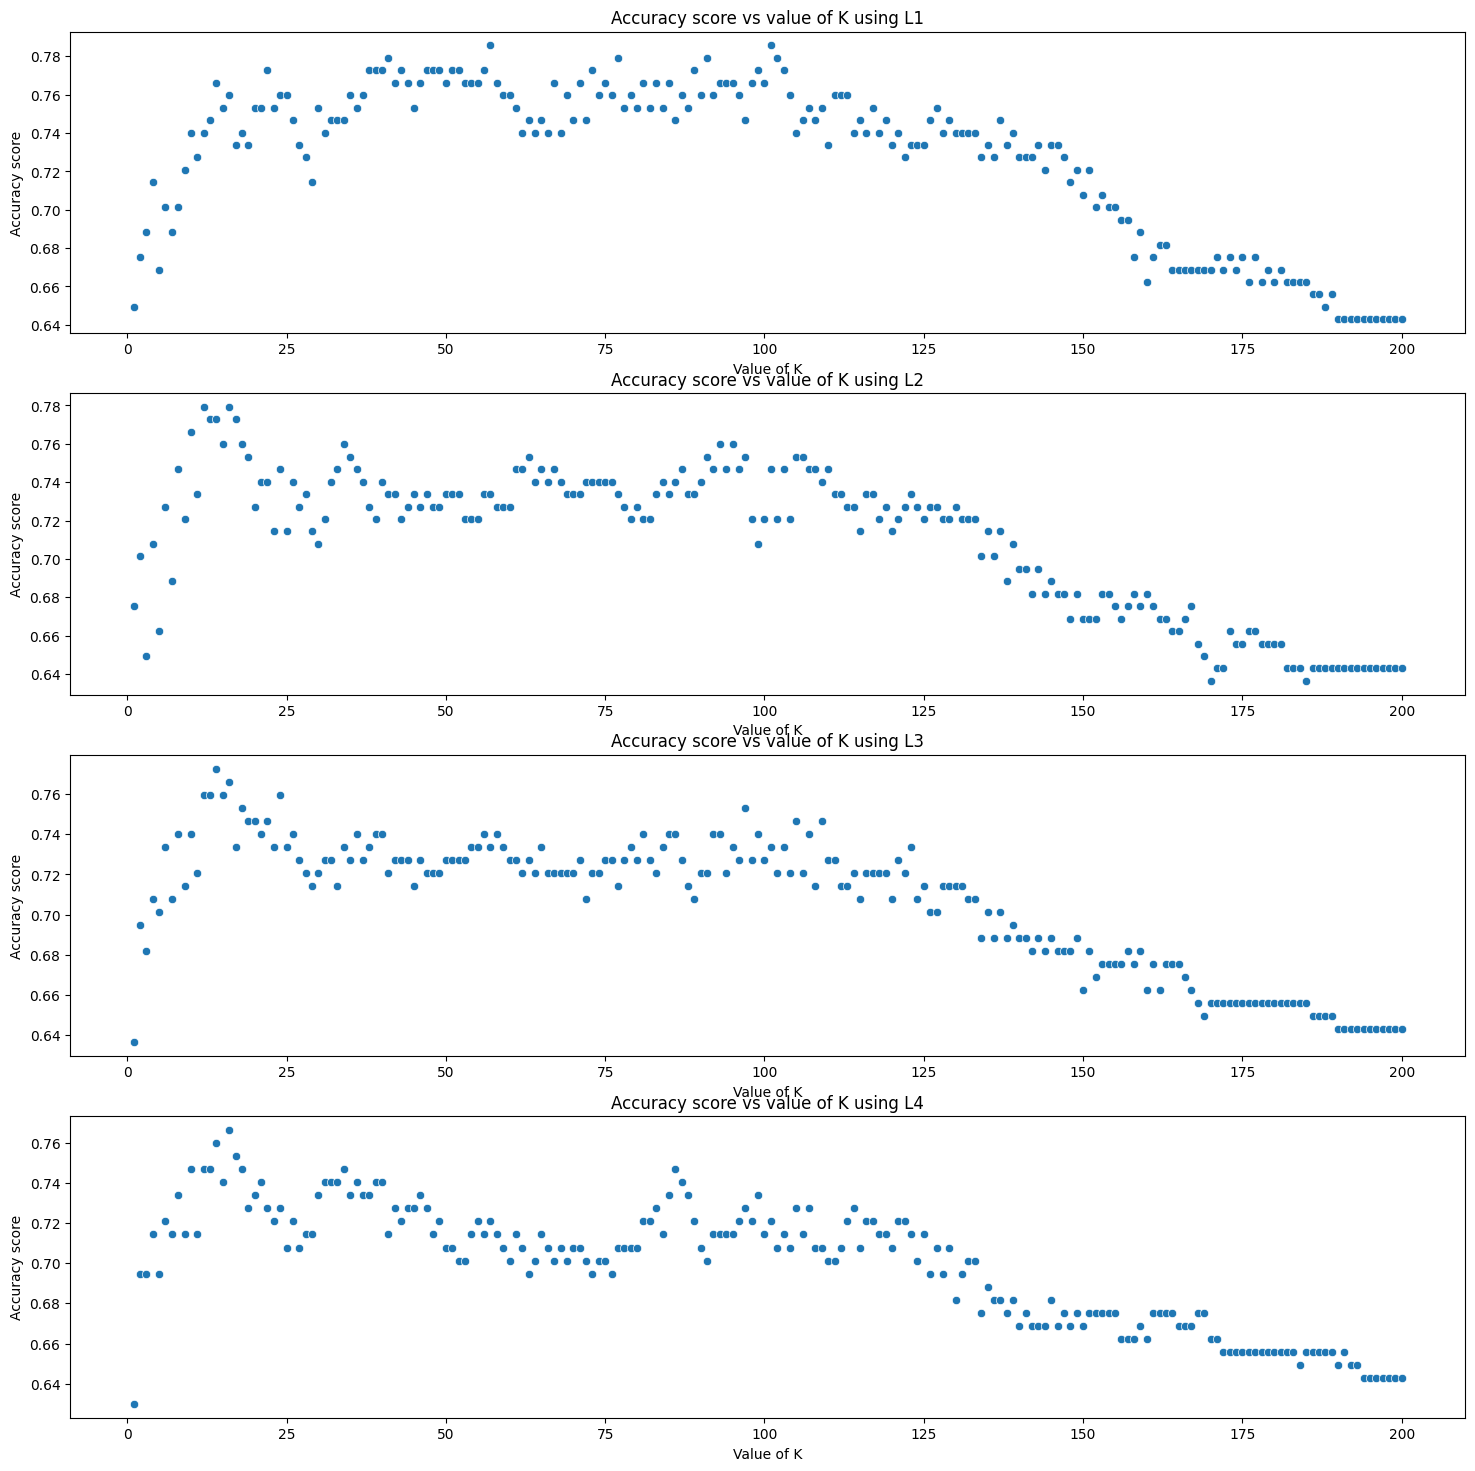

In [21]:
#Plotting the same to understand the distribution of accuracy against the number of neighbours
dict1={1:accuracy_list_L1,2:accuracy_list_L2,3:accuracy_list_L3,4:accuracy_list_L4}
dict2={1:"using L1",2:"using L2",3:"using L3",4:"using L4"}

plt.figure(figsize=(18,18))
for i in range(1,5):
    plt.subplot(4,1,i)
    sns.scatterplot(x=range(1,201),y=dict1[i]).set(title=f'Accuracy score vs value of K {dict2[i]}',xlabel='Value of K',ylabel='Accuracy score')

In [25]:
#calculating the value for k where the accuracy score is the maximum for L2,L1,L4 norms

max_value_L1=accuracy_list_L1[0]
max_value_L2=accuracy_list_L2[0]
max_value_L3=accuracy_list_L3[0]
max_value_L4=accuracy_list_L4[0]

max_index_L2=0
max_index_L3=0
max_index_L1=0
max_index_L4=0

for i in range(0,len(accuracy_list_L2)):
    if accuracy_list_L2[i]>max_value_L2:
        max_value_L2=accuracy_list_L2[i]
        max_index_L2=i
    
    if accuracy_list_L1[i]>max_value_L1:
        max_value_L1=accuracy_list_L1[i]
        max_index_L1=i

    if accuracy_list_L4[i]>max_value_L4:
        max_value_L4=accuracy_list_L4[i]
        max_index_L4=i
    
    if accuracy_list_L3[i]>max_value_L3:
        max_value_L3=accuracy_list_L3[i]
        max_index_L3=i

#at position 0 in the list, value of k is 1
print(f"the k value with highest accuracy score with L1 is {max_index_L1+1}")
print(f"Its accuracy value is {max_value_L1}\n")

print(f"the k value with highest accuracy score with L2 is {max_index_L2+1}")
print(f"Its accuracy value is {max_value_L2}\n")

print(f"the k value with highest accuracy score with L3 is {max_index_L3+1}")
print(f"Its accuracy value is {max_value_L3}\n")

print(f"the k value with highest accuracy score with L4 is {max_index_L4+1}")
print(f"Its accuracy value is {max_value_L4}")

    

the k value with highest accuracy score with L1 is 57
Its accuracy value is 0.7857142857142857

the k value with highest accuracy score with L2 is 12
Its accuracy value is 0.7792207792207793

the k value with highest accuracy score with L3 is 14
Its accuracy value is 0.7727272727272727

the k value with highest accuracy score with L4 is 16
Its accuracy value is 0.7662337662337663
